## Pérdida cuadrática y boosting mínimos cuadrados

Si $\ell(y,\hat{y})=(y-\hat{y})^2$, el objetivo FSAM en la iteración $m$ es:
$$L_m(\beta,\boldsymbol{\theta})%
=\sum_{i=1}^N (r_{im}-\beta F(\boldsymbol{x}_i;\boldsymbol{\theta}))^2
\qquad\text{con}\qquad r_{im}=y_i-f_{m-1}(\boldsymbol{x}_i)$$
**Boosting mínimos cuadrados** minimiza el objetivo fijando $\beta=1$ y ajustando $F$ a los residuos.

**Ejemplo:** regresión simple con boosting mínimos cuadrados

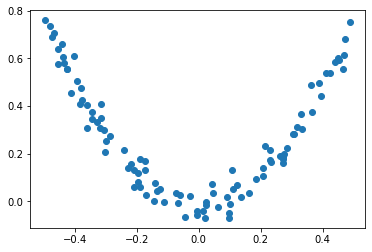

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)
fig, ax = plt.subplots(figsize=(6, 4));  ax.scatter(X, y)
x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()

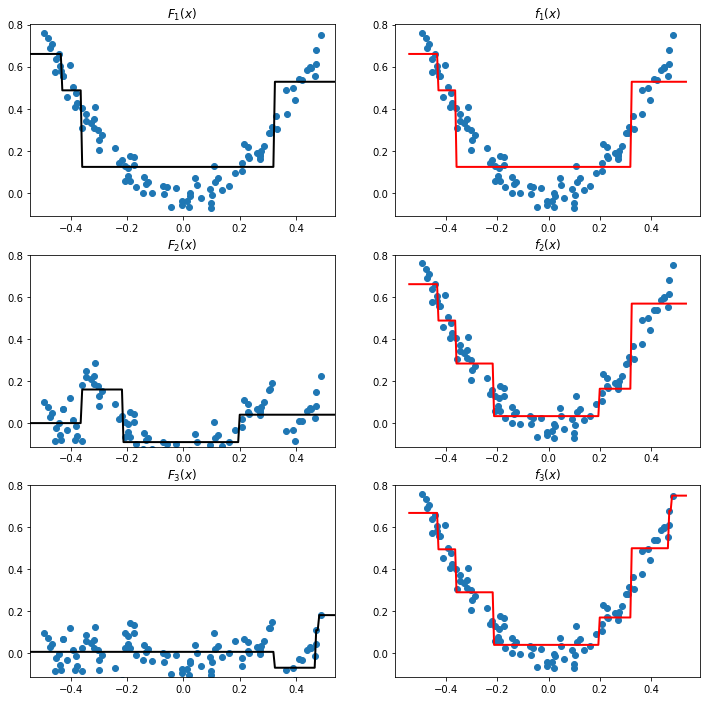

In [2]:
from sklearn.tree import DecisionTreeRegressor

M = 3; fig, axes = plt.subplots(M, 2, figsize=(12, M * 4))
res = np.copy(y); tt = []; xx = np.linspace(x_min, x_max, 200)
for m in np.arange(M):
    tree = DecisionTreeRegressor(max_depth=2, random_state=42)
    tree.fit(X, res); tt.append(tree)
    ax = axes[m, 0]
    ax.set_title('$F_{}(x)$'.format(m+1))
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)
    ax.scatter(X, res)
    res_pred = tree.predict(xx.reshape(-1, 1))
    ax.plot(xx, res_pred, 'k-', linewidth=2)
    ax = axes[m, 1]
    ax.set_title('$f_{}(x)$'.format(m+1))
    ax.scatter(X, y)
    y_pred = sum(t.predict(xx.reshape(-1, 1)) for t in tt)
    ax.plot(xx, y_pred, 'r-', linewidth=2)
    res -= tree.predict(X)